In [611]:
import numpy as np
import pandas as pd
import re

pd.__version__

'2.2.2'

In [612]:
emp=pd.read_excel(r"E:\Vivek\Placment\2-Sep-2024\2nd - Raw data - clean data\Rawdata.xlsx")

In [613]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [614]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [615]:
emp.isnull()

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [616]:
emp.isnull().sum()

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [617]:
emp.columns


Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [618]:
emp["Name"]

0      Mike
1    Teddy^
2     Uma#r
3      Jane
4    Uttam*
5       Kim
Name: Name, dtype: object

In [619]:
emp['Name'] = emp["Name"].str.replace(r'\W',"",regex=True)   # non word charecter

In [620]:
emp["Name"]

0     Mike
1    Teddy
2     Umar
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object

In [621]:
emp["Domain"]=emp["Domain"].str.replace(r"\W","",regex=True)

In [622]:
emp["Domain"]

0    Datascience
1        Testing
2    Dataanalyst
3      Analytics
4     Statistics
5            NLP
Name: Domain, dtype: object

In [623]:
emp["Age"]=emp["Age"].str.replace(r"\W","",regex=True)

In [624]:
emp["Age"]=emp["Age"].str.extract(r"(\d+)")
#emp["Age"]=emp["Age"].str.replace(r"\D","",regex=True)

In [625]:
emp["Age"]

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [626]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5^00#0,2+
1,Teddy,Testing,45,Bangalore,10%%000,<3
2,Umar,Dataanalyst,NaN,NaN,1$5%000,4> yrs
3,Jane,Analytics,NaN,Hyderbad,2000^0,NaN
4,Uttam,Statistics,67,NaN,30000-,5+ year
5,Kim,NLP,55,Delhi,6000^$0,10+


In [627]:
emp["Salary"]=emp["Salary"].str.replace(r"\D","",regex=True)

In [628]:
emp["Salary"]

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: object

In [629]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2+
1,Teddy,Testing,45,Bangalore,10000,<3
2,Umar,Dataanalyst,NaN,NaN,15000,4> yrs
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5+ year
5,Kim,NLP,55,Delhi,60000,10+


In [630]:
emp["Exp"]=emp["Exp"].str.extract(r"(\d+)")

In [631]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [632]:
cleandata=emp.copy()

In [633]:
cleandata

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [634]:
cleandata["Age"]=cleandata["Age"].fillna(np.mean(pd.to_numeric(cleandata["Age"])))

In [635]:
cleandata["Age"]

0       34
1       45
2    50.25
3    50.25
4       67
5       55
Name: Age, dtype: object

In [636]:
cleandata["Exp"]

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

In [637]:
cleandata["Exp"]=cleandata["Exp"].fillna(np.mean(pd.to_numeric(cleandata["Exp"])))

In [638]:
cleandata["Exp"]

0      2
1      3
2      4
3    4.8
4      5
5     10
Name: Exp, dtype: object

In [639]:
cleandata["Location"].isnull().sum()

2

In [640]:
cleandata["Location"]

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

In [641]:
cleandata["Location"]=cleandata["Location"].fillna(cleandata["Location"].mode()[0])

In [642]:
cleandata["Location"]

0       Mumbai
1    Bangalore
2    Bangalore
3     Hyderbad
4    Bangalore
5        Delhi
Name: Location, dtype: object

In [643]:
cleandata

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50.25,Bangalore,15000,4
3,Jane,Analytics,50.25,Hyderbad,20000,4.8
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [644]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      object
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [646]:
cleandata["Age"]=cleandata["Age"].astype(int)
cleandata["Salary"]=cleandata["Salary"].astype(int)
cleandata["Exp"]=cleandata["Exp"].astype(int)

In [647]:
cleandata

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [648]:
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      int32 
 3   Location  6 non-null      object
 4   Salary    6 non-null      int32 
 5   Exp       6 non-null      int32 
dtypes: int32(3), object(3)
memory usage: 348.0+ bytes


In [649]:
cleandata.to_excel("Clean_data.xlsx")

In [650]:
import os
os.getcwd()

'e:\\Vivek\\Placment\\31-Aug-2024\\31st'

In [651]:
import matplotlib.pyplot as plt
import seaborn as sns


In [654]:
import warnings
warnings.filterwarnings("ignore")

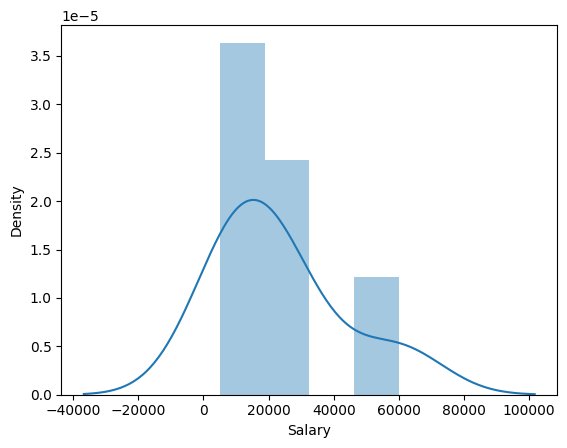

In [656]:
vis1=sns.distplot(cleandata["Salary"])

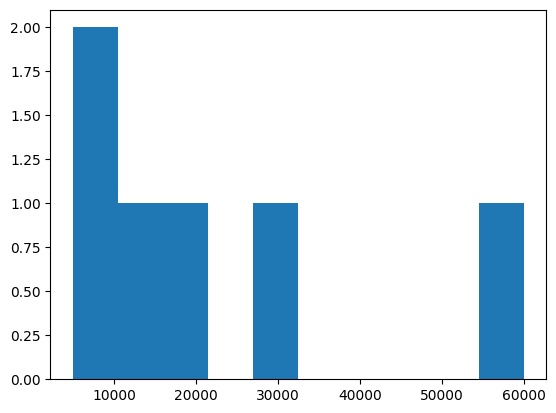

In [657]:
vis2=plt.hist(cleandata["Salary"])

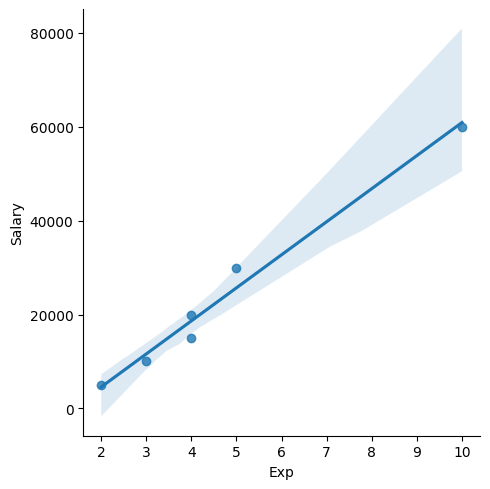

In [659]:
vis3=sns.lmplot(data=cleandata, x="Exp",y="Salary")

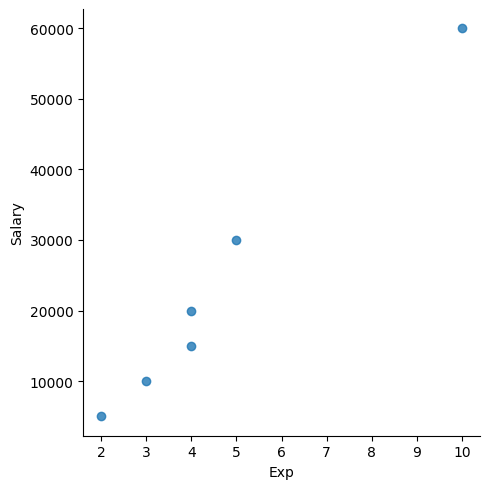

In [661]:
vis4=sns.lmplot(data=cleandata, x="Exp", y="Salary", fit_reg=False)

In [662]:
imputation=pd.get_dummies(cleandata)

In [663]:
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
1,45,10000,3,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
2,50,15000,4,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
3,50,20000,4,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,67,30000,5,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False
5,55,60000,10,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False
